In [ ]:
'''
TensorFlow Object Detection API
    - TensorFlow Object Detection API is a framework for using pretrained Object detection Models on the go like
      YOLO,SSD,RCNN,Faster-RCNN etc.
      
TensorFlow Object Detection API
    - TFOD1
    - TFOD2

Note: 
    ** TFOD 1 and TFOD 2(Based on tensorflow)
    ** YOLO V5 and Detectron(Based on Pytorch)
    
The Tensorflow Object Detection API uses Protobufs to configure model and training parameters. Before the framework can be 
used, the Protobuf libraries must be downloaded and compiled

In [ ]:
'''
Difference between TFOD1 and TFOD2
    In TFOD v2 we need COCO API

In [ ]:
'''
Anotation format conversion in TFOD
    XML->CSV->TFRecords

In [ ]:
'''
Tensorflow Model (1.13) for Object Detection

https://github.com/tensorflow/models/tree/r1.13.0/research/object_detection

In [ ]:
'''
Steps to Setup TFOD API Project

    1. Downloading the tensorflow Model Garden
    2. Protobuf Installation/Compilation
    3. COCO API Installation
    4. Install the Object Detection API
    5. Preparing the workspace
    6. Preparing the dataset
        - Annotate the dataset using labelImg
    7. Partiotion dataset
    8. Create Label map
    9. Create Tensrflow records
    10. Configuring a Training pipeline
    11. Trainig the model
    12. Evaluating the model
    13. Monitoring training job progress using tensorboard
    14. Exporting a trained inference Graph

In [ ]:
'''
Setup TFOD Project

1. Download the TFOD API 
    https://github.com/tensorflow/models/tree/v1.13.0

2. Download the Pretrained Model
    http://download.tensorflow.org/models/object_detection/faster_rcnn_inception_v2_coco_2018_01_28.tar.gz

3. Extrcat above the files and keep inside C:\TFOD_Demo folder

4. Create Conda Environment for TFOD1
    Open command promport and run below the commands
        1. conda create -n your_env_name python=3.6
        2. conda activate your_env_name
        3. pip install pillow lxml Cython contextlib2 jupyter matplotlib pandas opencv-python tensorflow==1.14.0
        4. get inside the 'Research' folder cd C:\TFOD_Demo\models\research
        5. Install Object Detection : python setup.py install
        6. conda install -c anaconda protobuf

6. Run below the command from rearch directory
    - conda install -c anaconda protobuf

7. Protobuff to py conversion
    Go to below the path(C:\TFOD_Demo\models\research) and run the command
    protoc object_detection/protos/*.proto --python_out=.


8. Open Jupyter notebook from 'Research' directory from avove the conda environment

9. Check the TF versoin from the Jupyter notebook and it showuld be of 1.14 

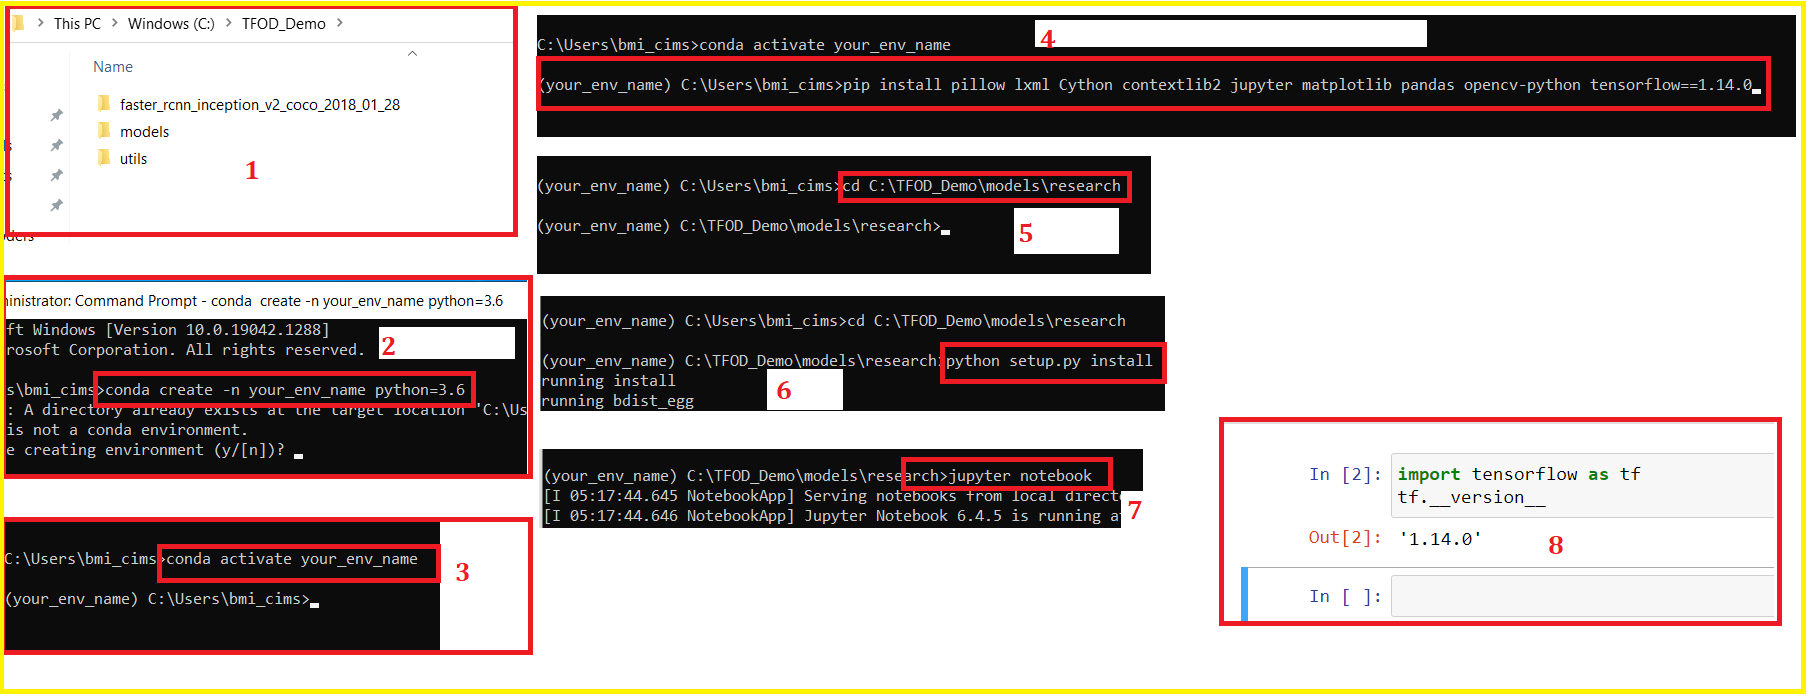

In [ ]:
'''
Train TFOD for Custom dataset

Note : Assumpation is here that We are are ready with train and test data which are annotated using LebelImg

1. Copy below the files aand folders from  'utils' to 'reasearch'
    - images,training,generate_tfrecord.py,xml_to_csv

2.Convert XML CSV using the for train and test Seperately
    Run below the command
        - (your_env_name) C:\TFOD_Demo\models\research>python xml_to_csv.py

3.Generate TF records from train_csv and test_csv
    - Run Below the command
        python generate_tfrecord.py --csv_input=images/train_labels.csv --image_dir=images/train --output_path=train.record
        python generate_tfrecord.py --csv_input=images/test_labels.csv --image_dir=images/test --output_path=test.record

4.Copy the pretrained Model to Research Folder
    - Copy 'faster_rcnn_inception_v2_coco_2018_01_28' inside research folder

Note: 'training' folder in the 'research' contains *.pbtxt file which contains or reprsentation of classes in the image

5. Copy the Configuration file corresponidng to pretrained model you have choosen
    - Copy the config file from 'C:\TFOD_Demo\models\research\object_detection\samples\configs'
    - Here were are copying 'faster_rcnn_inception_v2_coco.config' to 'training' folder in the 'research'

6. Open faster_rcnn_inception_v2_coco.config file and modify based on the requirements
    - Change num_classes: 6
    - fine_tune_checkpoint: "C:/TFOD_Demo/models/research/faster_rcnn_inception_v2_coco_2018_01_28/model.ckpt"
    - num_steps: 2500
    - train_input_reader: 
        - input_path: "C:/TFOD_Demo/models/research/train.record"
        - label_map_path: "C:/TFOD_Demo/models/research/training/labelmap.pbtxt"
    - eval_input_reader
        - input_path: "C:/TFOD_Demo/models/research/test.record"
        - label_map_path: "C:/TFOD_Demo/models/research/training/labelmap.pbtxt"

7. Copy 'train.py' file from 'research\object_detection\legacy' to 'research' folder
   Copy folders 'deployment' and 'nets' from 'models\research\slim' to 'models\research'

8. Run Training command
    - python train.py --logtostderr --train_dir=training/ --pipeline_config_path=training/faster_rcnn_inception_v2_coco.config
    
9. Copy and paste the 'export_inference_graph' file from '\models\research\object_detection' to '\models\research'

10. Convert the checkpoints files into modules using below the command
    - python export_inference_graph.py --input_type image_tensor --pipeline_config_path training/
      faster_rcnn_inception_v2_coco.config --trained_checkpoint_prefix training/model.ckpt-1000 --output_directory 
      inference_graph
      
11.Folder directory 'reseach/inference_graph' will be created along with final model which is in the xtension of '*.pb'